# PySpark 

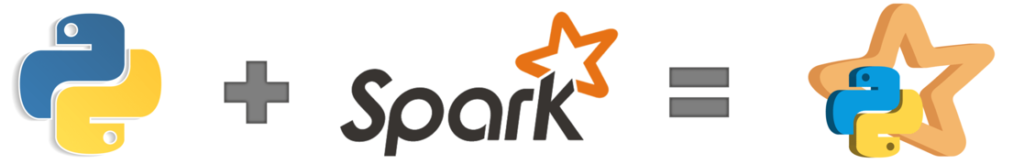


PySpark is an interface for Apache Spark in Python. It not only allows you to write Spark applications using Python APIs, but also provides the PySpark shell for interactively analyzing your data in a distributed environment. PySpark supports most of Spark’s features such as Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) and Spark Core.


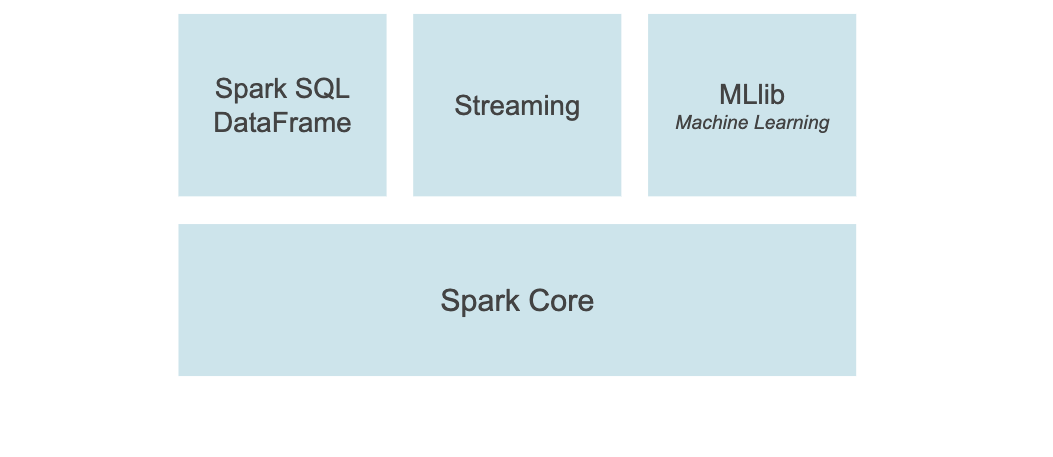



### Spark SQL and DataFrame

Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrame and can also act as distributed SQL query engine.

### Streaming

Running on top of Spark, the streaming feature in Apache Spark enables powerful interactive and analytical applications across both streaming and historical data, while inheriting Spark’s ease of use and fault tolerance characteristics.

### MLlib

Built on top of Spark, MLlib is a scalable machine learning library that provides a uniform set of high-level APIs that help users create and tune practical machine learning pipelines.

### Spark Core

Spark Core is the underlying general execution engine for the Spark platform that all other functionality is built on top of. It provides an RDD (Resilient Distributed Dataset) and in-memory computing capabilities.


## Lazy Evaluation

PySpark DataFrames are lazily evaluated. They are implemented on top of RDDs. When Spark transforms data, it does not immediately compute the transformation but plans how to compute later. When actions such as collect() are explicitly called, the computation starts. 


To understand this, it's important to differentiate between transformations and actions:

- **Transformations**: These are operations on DataFrames or RDDs that produce a new DataFrame or RDD. Examples include `map`, `filter`, `groupBy`, and so on. When you apply a transformation, Spark doesn't immediately process the data. Instead, it builds up a logical execution plan.

- **Actions**: These are operations that trigger the computation and produce a result. Examples include `count`, `collect`, `saveAsTextFile`, and so on. When you call an action, Spark will execute the transformations that have been recorded, in an optimized manner.

#### Advantages of Lazy Evaluation:

1. **Optimization**: Since Spark waits until it has a full plan of transformations, it can optimize the execution. For instance, it can reorder operations or merge similar operations to run together. This can greatly enhance performance.
2. **Reduced Computation**: Not all parts of the dataset might need to be touched. For example, if you have a chain of transformations followed by an action that only needs the first 10 rows of data, Spark will compute only enough to produce those 10 rows, rather than processing the entire dataset.
3. **Pipelining**: Multiple narrow transformations (transformations that have a one-to-one relationship between input and output partitions) can be grouped together to be executed in a single stage. This reduces the overhead of data shuffling between stages.



## Installation

First we have to install pyspark as follows:

In [1]:
!pip install pyspark

In [2]:
#Importing
from pyspark.sql import SparkSession

PySpark applications start with initializing SparkSession which is the entry point of PySpark as below.

In [3]:
# Creating SparkSession
spark = SparkSession.builder.getOrCreate()

23/10/01 09:05:02 WARN Utils: Your hostname, Hebers-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.5 instead (on interface en0)
23/10/01 09:05:02 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/01 09:05:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/01 09:05:03 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


When you work with Spark in local mode (i.e., not in a distributed cluster), Spark runs on your local machine using all available CPU cores by default. If you want to configure the number of cores used, you can do so when creating a Spark session.

In [4]:
#Checking the number of cores used
spark.sparkContext.getConf().get("spark.master")

'local[*]'

If you see a value like `local[*]`, it means Spark is using all available cores. If you see `local[4]`, it means Spark is using 4 cores.

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MyApplication") \
    .master("local[2]")  # Uses 2 cores
    .getOrCreate()


## Data Frame Creation

You can create PySpark DataFrame from a list of rows

In [5]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

In [6]:
df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

Create a PySpark DataFrame with an explicit schema.

In [7]:
df = spark.createDataFrame([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
], schema='a long, b double, c string, d date, e timestamp')
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

Create a PySpark DataFrame from a pandas DataFrame

In [8]:
pandas_df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2., 3., 4.],
    'c': ['string1', 'string2', 'string3'],
    'd': [date(2000, 1, 1), date(2000, 2, 1), date(2000, 3, 1)],
    'e': [datetime(2000, 1, 1, 12, 0), datetime(2000, 1, 2, 12, 0), datetime(2000, 1, 3, 12, 0)]
})
df = spark.createDataFrame(pandas_df)
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

Create a PySpark DataFrame from an RDD consisting of a list of tuples.

In [9]:
rdd = spark.sparkContext.parallelize([
    (1, 2., 'string1', date(2000, 1, 1), datetime(2000, 1, 1, 12, 0)),
    (2, 3., 'string2', date(2000, 2, 1), datetime(2000, 1, 2, 12, 0)),
    (3, 4., 'string3', date(2000, 3, 1), datetime(2000, 1, 3, 12, 0))
])
df = spark.createDataFrame(rdd, schema=['a', 'b', 'c', 'd', 'e'])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

## Show and Schema

In [10]:
# All DataFrames above result same.
df.show()
df.printSchema()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|
+---+---+-------+----------+-------------------+

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



## Viewing Data

In [11]:
#The top rows of a DataFrame can be displayed using DataFrame.show().
df.show(1)

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+
only showing top 1 row



Alternatively, you can enable spark.sql.repl.eagerEval.enabled configuration for the eager evaluation of PySpark DataFrame in notebooks such as Jupyter.

In [12]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
df

a,b,c,d,e
1,2.0,string1,2000-01-01,2000-01-01 12:00:00
2,3.0,string2,2000-02-01,2000-01-02 12:00:00
3,4.0,string3,2000-03-01,2000-01-03 12:00:00


The rows can also be show vertically. This is usefull when rows are too long

In [13]:
df.show(1, vertical=True)

-RECORD 0------------------
 a   | 1                   
 b   | 2.0                 
 c   | string1             
 d   | 2000-01-01          
 e   | 2000-01-01 12:00:00 
only showing top 1 row



We can see columns names

In [14]:
df.columns

['a', 'b', 'c', 'd', 'e']

Show the summary of the Data Frame

In [15]:
df.select('a', 'b', 'c').describe().show()

+-------+---+---+-------+
|summary|  a|  b|      c|
+-------+---+---+-------+
|  count|  3|  3|      3|
|   mean|2.0|3.0|   NULL|
| stddev|1.0|1.0|   NULL|
|    min|  1|2.0|string1|
|    max|  3|4.0|string3|
+-------+---+---+-------+



DataFrame.collect() collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.

In [16]:
df.collect()

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=3, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

In order to avoid throwing an out-of-memory exception, use DataFrame.take() or DataFrame.tail().

In [17]:
df.take(1)

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0))]

PySpark DataFrame also provides the conversion back to a pandas DataFrame to leverage pandas API. Note that toPandas also collects all data into the driver side that can easily cause an out-of-memory-error when the data is too large to fit into the driver side.

In [18]:
df.toPandas()

,a,b,c,d,e
0,1,2.0,string1,2000-01-01,2000-01-01 12:00:00
1,2,3.0,string2,2000-02-01,2000-01-02 12:00:00
2,3,4.0,string3,2000-03-01,2000-01-03 12:00:00


## Selecting and Accessing Data

PySpark DataFrame is lazily evaluated and simply selecting a column does not trigger the computation but it returns a Column instance.

In [19]:
df.a

Column<'a'>

These Columns can be used to select the columns from a DataFrame. For example, DataFrame.select() takes the Column instances that returns another DataFrame.

In [20]:
df.select(df.c).show()

+-------+
|      c|
+-------+
|string1|
|string2|
|string3|
+-------+



Assign new Column instance.

In [21]:
from pyspark.sql.functions import upper
df.withColumn('upper_c', upper(df.c)).show()


+---+---+-------+----------+-------------------+-------+
|  a|  b|      c|         d|                  e|upper_c|
+---+---+-------+----------+-------------------+-------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|STRING1|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|STRING2|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|STRING3|
+---+---+-------+----------+-------------------+-------+



To select a subset of rows, use DataFrame.filter().

In [22]:
df.filter(df.a == 1).show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+



## Applying a Function

PySpark supports various UDFs and APIs to allow users to execute Python native functions. See also the latest Pandas UDFs and Pandas Function APIs. For instance, the example below allows users to directly use the APIs in a pandas Series within Python native function.



In [23]:
import pandas as pd
from pyspark.sql.functions import pandas_udf

@pandas_udf('long')
def pandas_plus_one(series: pd.Series) -> pd.Series:
    # Simply plus one by using pandas Series.
    return series + 1

df.select(pandas_plus_one(df.a)).show()

+------------------+
|pandas_plus_one(a)|
+------------------+
|                 2|
|                 3|
|                 4|
+------------------+



## Grouping Data

PySpark DataFrame also provides a way of handling grouped data by using the common approach, split-apply-combine strategy. It groups the data by a certain condition applies a function to each group and then combines them back to the DataFrame.

In [24]:
df = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])
df.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



Grouping and then applying the avg() function to the resulting groups.

In [25]:
df.groupby('color').avg().show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
| blue|    3.0|   30.0|
|black|    6.0|   60.0|
+-----+-------+-------+



You can also apply a Python native function against each group by using pandas API.

In [26]:
def plus_mean(pandas_df):
    return pandas_df.assign(v1=pandas_df.v1 - pandas_df.v1.mean())

df.groupby('color').applyInPandas(plus_mean, schema=df.schema).show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|black|carrot|  0| 60|
| blue|banana| -1| 20|
| blue| grape|  1| 40|
|  red|banana| -3| 10|
|  red|carrot| -1| 30|
|  red|carrot|  0| 50|
|  red|banana|  2| 70|
|  red| grape|  3| 80|
+-----+------+---+---+



Co-grouping and applying a function.

In [27]:
df1 = spark.createDataFrame(
    [(20000101, 1, 1.0), (20000101, 2, 2.0), (20000102, 1, 3.0), (20000102, 2, 4.0)],
    ('time', 'id', 'v1'))

df2 = spark.createDataFrame(
    [(20000101, 1, 'x'), (20000101, 2, 'y')],
    ('time', 'id', 'v2'))

def asof_join(l, r):
    return pd.merge_asof(l, r, on='time', by='id')

df1.groupby('id').cogroup(df2.groupby('id')).applyInPandas(
    asof_join, schema='time int, id int, v1 double, v2 string').show()

+--------+---+---+---+
|    time| id| v1| v2|
+--------+---+---+---+
|20000101|  1|1.0|  x|
|20000102|  1|3.0|  x|
|20000101|  2|2.0|  y|
|20000102|  2|4.0|  y|
+--------+---+---+---+



## Getting Data in/out

In [28]:
df.write.csv('foo.csv', header=True)
spark.read.csv('foo.csv', header=True).show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|black|carrot|  6| 60|
| blue|banana|  2| 20|
|  red|carrot|  5| 50|
|  red|banana|  7| 70|
|  red|banana|  1| 10|
| blue| grape|  4| 40|
|  red|carrot|  3| 30|
|  red| grape|  8| 80|
+-----+------+---+---+



## Working with SQL

DataFrame and Spark SQL share the same execution engine so they can be interchangeably used seamlessly. For example, you can register the DataFrame as a table and run a SQL easily as below:

In [29]:
df.createOrReplaceTempView("tableA")
spark.sql("SELECT count(*) from tableA").show()

+--------+
|count(1)|
+--------+
|       8|
+--------+



In addition, UDFs can be registered and invoked in SQL out of the box:

In [30]:
@pandas_udf("integer")
def add_one(s: pd.Series) -> pd.Series:
    return s + 1

spark.udf.register("add_one", add_one)
spark.sql("SELECT add_one(v1) FROM tableA").show()

+-----------+
|add_one(v1)|
+-----------+
|          2|
|          3|
|          4|
|          5|
|          6|
|          7|
|          8|
|          9|
+-----------+



These SQL expressions can directly be mixed and used as PySpark columns.

In [31]:
from pyspark.sql.functions import expr

df.selectExpr('add_one(v1)').show()
df.select(expr('count(*)') > 0).show()

+-----------+
|add_one(v1)|
+-----------+
|          2|
|          3|
|          4|
|          5|
|          6|
|          7|
|          8|
|          9|
+-----------+

+--------------+
|(count(1) > 0)|
+--------------+
|          true|
+--------------+



## Practical Example

In [33]:
# Reading data.
df = spark.read.csv('data/titanic_train.csv', header = True,
                    inferSchema= True) # InferSchema so as to get the correct datatype
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [34]:
# Showing the type of this object. 
type(df)

pyspark.sql.dataframe.DataFrame

In [35]:
# Schema
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [36]:
# Get the columns
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [37]:
# How to select columns
df.select(['Survived', 'Name']).show()

+--------+--------------------+
|Survived|                Name|
+--------+--------------------+
|       0|Braund, Mr. Owen ...|
|       1|Cumings, Mrs. Joh...|
|       1|Heikkinen, Miss. ...|
|       1|Futrelle, Mrs. Ja...|
|       0|Allen, Mr. Willia...|
|       0|    Moran, Mr. James|
|       0|McCarthy, Mr. Tim...|
|       0|Palsson, Master. ...|
|       1|Johnson, Mrs. Osc...|
|       1|Nasser, Mrs. Nich...|
|       1|Sandstrom, Miss. ...|
|       1|Bonnell, Miss. El...|
|       0|Saundercock, Mr. ...|
|       0|Andersson, Mr. An...|
|       0|Vestrom, Miss. Hu...|
|       1|Hewlett, Mrs. (Ma...|
|       0|Rice, Master. Eugene|
|       1|Williams, Mr. Cha...|
|       0|Vander Planke, Mr...|
|       1|Masselmani, Mrs. ...|
+--------+--------------------+
only showing top 20 rows



In [38]:
# Showing data types
df.dtypes

[('PassengerId', 'int'),
 ('Survived', 'int'),
 ('Pclass', 'int'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'double'),
 ('SibSp', 'int'),
 ('Parch', 'int'),
 ('Ticket', 'string'),
 ('Fare', 'double'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [39]:
# Describe or summary 
df.describe().show()

23/10/01 09:05:39 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|              Parch|            Ticket|             Fare|Cabin|Embarked|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+-------------------+------------------+-----------------+-----+--------+
|  count|              891|                891|               891|                 891|   891|               714|               891|                891|               891|              891|  204|     889|
|   mean|            446.0| 0.3838383838383838| 2.308641975308642|                NULL|  NULL| 29.69911764705882|0.5230078563411896|0.38159371492704824|260318.54916792738| 32.20420

In [40]:
# Adding columns in PySpark df
df = df.withColumn('Converted Fare', df['Fare'] * 2)

In [41]:
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|Converted Fare|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+--------------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|          14.5|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|      142.5666|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|         15.85|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|         106.2|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450

In [42]:
# Dropping columns
df = df.drop('Converted Fare')

In [43]:
df.show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [44]:
# Renaming Columns
df.withColumnRenamed('Name', 'Full Name').show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|           Full Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

In [45]:
# To eliminate all observation or columns with NA, Null
# By default, it will remove any row that contains at least one null value.
df.na.drop().show()

+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|     Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----------+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|   PC 17599| 71.2833|        C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|     113803|    53.1|       C123|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      17463| 51.8625|        E46|       S|
|         11|       1|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|    PP 9549|    16.7|         G6|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|     113783|   26.55|       C103|       S|
|         22|       1|     2|Beesley, Mr. Lawr...|  male|34.0|  

In [46]:
# The "thresh" argument is used to set a threshold for the number of non-null values a row must have before it is deleted. 
# In this case, the threshold is set to 2, which means that a row must have at least two non-null values in order for 
# it not to be deleted.

df.na.drop(how ='all', thresh=2).show() # There are thres

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [47]:
# This line of code removes the rows from the "df" DataFrame that have null values in the "Survived" column.
df.na.drop(how='any', subset=['Survived']).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

In [48]:
from pyspark.sql.functions import isnull, sum

# Assuming `df` is the PySpark DataFrame you want to check
null_counts = df.select([sum(isnull(c).cast("int")).alias(c) for c in df.columns])
null_counts.show()


+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [49]:
# Filling the missing values
df.na.fill(0, ['Age']).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male| 0.0|    0|    0|      

In [50]:
from pyspark.ml.feature import Imputer
imputer = Imputer(
    inputCols=['Age', 'Fare'],
    outputCols=["{}_impute".format(c) for c in ['Age', 'Fare']]).setStrategy('mean')

In [51]:
imputer.fit(df).transform(df).show(8)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|       Age_impute|Fare_impute|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------------+-----------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|             22.0|       7.25|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|             38.0|    71.2833|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|             26.0|      7.925|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|             35.

In [52]:
# Filter Operation
df.filter('Age < 10').show()

+-----------+--------+------+--------------------+------+----+-----+-----+-------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|       Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-------------+-------+-----+--------+
|          8|       0|     3|Palsson, Master. ...|  male| 2.0|    3|    1|       349909| 21.075| NULL|       S|
|         11|       1|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|      PP 9549|   16.7|   G6|       S|
|         17|       0|     3|Rice, Master. Eugene|  male| 2.0|    4|    1|       382652| 29.125| NULL|       Q|
|         25|       0|     3|Palsson, Miss. To...|female| 8.0|    3|    1|       349909| 21.075| NULL|       S|
|         44|       1|     2|Laroche, Miss. Si...|female| 3.0|    1|    2|SC/Paris 2123|41.5792| NULL|       C|
|         51|       0|     3|Panula, Master. J...|  male| 7.0|    4|    1|      3101295|39.6875| NULL|  

In [53]:
# Filter Operation
df.filter('Age < 10').select(['Name', 'Age']).show()

+--------------------+----+
|                Name| Age|
+--------------------+----+
|Palsson, Master. ...| 2.0|
|Sandstrom, Miss. ...| 4.0|
|Rice, Master. Eugene| 2.0|
|Palsson, Miss. To...| 8.0|
|Laroche, Miss. Si...| 3.0|
|Panula, Master. J...| 7.0|
|West, Miss. Const...| 5.0|
|Skoog, Master. Ha...| 4.0|
|Caldwell, Master....|0.83|
|Andersson, Miss. ...| 2.0|
|"Ford, Miss. Robi...| 9.0|
|Panula, Master. E...| 1.0|
|"Goldsmith, Maste...| 9.0|
|Rice, Master. Arthur| 4.0|
|Johnson, Miss. El...| 1.0|
|Asplund, Master. ...| 9.0|
|Becker, Master. R...| 1.0|
|Kink-Heilmann, Mi...| 4.0|
|Navratil, Master....| 3.0|
|Strom, Miss. Telm...| 2.0|
+--------------------+----+
only showing top 20 rows



In [54]:
# Filter Operation
df.filter((df['Age'] < 10) & (df['Sex'] == 'female')).select(['Name', 'Age', 'Sex']).show()


+--------------------+----+------+
|                Name| Age|   Sex|
+--------------------+----+------+
|Sandstrom, Miss. ...| 4.0|female|
|Palsson, Miss. To...| 8.0|female|
|Laroche, Miss. Si...| 3.0|female|
|West, Miss. Const...| 5.0|female|
|Andersson, Miss. ...| 2.0|female|
|"Ford, Miss. Robi...| 9.0|female|
|Johnson, Miss. El...| 1.0|female|
|Kink-Heilmann, Mi...| 4.0|female|
|Strom, Miss. Telm...| 2.0|female|
|Asplund, Miss. Li...| 5.0|female|
|"Collyer, Miss. M...| 8.0|female|
|Allison, Miss. He...| 2.0|female|
|Palsson, Miss. St...| 3.0|female|
|"Nakid, Miss. Mar...| 1.0|female|
|Baclini, Miss. Ma...| 5.0|female|
|Baclini, Miss. He...|0.75|female|
|Hirvonen, Miss. H...| 2.0|female|
|Quick, Miss. Phyl...| 2.0|female|
|Hart, Miss. Eva M...| 7.0|female|
|Andersson, Miss. ...| 9.0|female|
+--------------------+----+------+
only showing top 20 rows



In [55]:
df.filter(~(df['Age'] < 10)).show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----------+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|       NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|        C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|       NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1|       C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|       NULL|       S|
|          7|       0|     1|McC

In [56]:
# Agregate function

df.groupby('Sex').sum().show()

+------+----------------+-------------+-----------+--------+----------+----------+-----------------+
|   Sex|sum(PassengerId)|sum(Survived)|sum(Pclass)|sum(Age)|sum(SibSp)|sum(Parch)|        sum(Fare)|
+------+----------------+-------------+-----------+--------+----------+----------+-----------------+
|female|          135343|          233|        678|  7286.0|       218|       204|13966.66279999999|
|  male|          262043|          109|       1379|13919.17|       248|       136|14727.28649999999|
+------+----------------+-------------+-----------+--------+----------+----------+-----------------+



In [57]:
# Count
df.groupby('Sex').count().show()

+------+-----+
|   Sex|count|
+------+-----+
|female|  314|
|  male|  577|
+------+-----+



https://www.youtube.com/watch?v=_C8kWso4ne4